In [1]:
from sklearn.datasets import load_breast_cancer

br_cancer = load_breast_cancer()

In [2]:
br_cancer.data[0:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [3]:
br_cancer.target[0:3]

array([0, 0, 0])

In [4]:
X, y = br_cancer['data'], br_cancer['target']

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred_knn = knn_model.predict(X_test)
y_pred_sgd = sgd_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
knn_score = accuracy_score(y_test, y_pred_knn)
sgd_score = accuracy_score(y_test, y_pred_sgd)
log_score = accuracy_score(y_test, y_pred_log)

print("Accuracy score (KNN): ", knn_score)
print("Accuracy score (SGD): ", sgd_score)
print("Accuracy score (Logistic): ", log_score)

Accuracy score (KNN):  0.9590643274853801
Accuracy score (SGD):  0.9649122807017544
Accuracy score (Logistic):  0.9824561403508771


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[ 59,   4],
       [  3, 105]], dtype=int64)

In [11]:
confusion_matrix(y_test, y_pred_sgd)

array([[ 61,   2],
       [  4, 104]], dtype=int64)

In [12]:
confusion_matrix(y_test, y_pred_log)

array([[ 62,   1],
       [  2, 106]], dtype=int64)

In [13]:
from sklearn.metrics import classification_report

targets = br_cancer.target_names

print(classification_report(y_test, y_pred_knn, target_names=targets))  # knn classification report
print(classification_report(y_test, y_pred_sgd, target_names=targets))  # sgd classification report
print(classification_report(y_test, y_pred_log, target_names=targets))  # logistic classification report

              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        63
      benign       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [14]:
print(classification_report(y_test, y_pred_knn, target_names=targets))

              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [15]:
print(classification_report(y_test, y_pred_sgd, target_names=targets))

              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        63
      benign       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [16]:
print(classification_report(y_test, y_pred_log, target_names=targets))

              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



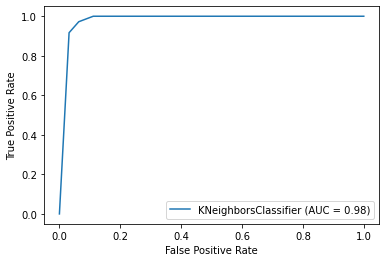

In [17]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knn_model, X_test, y_test)

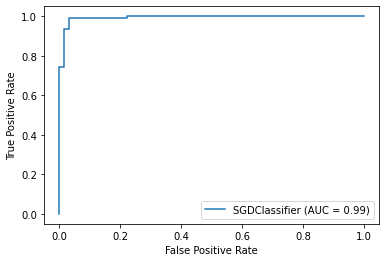

In [18]:
plot_roc_curve(sgd_model, X_test, y_test)

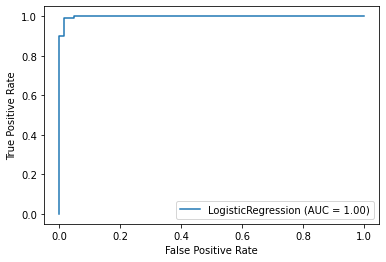

In [19]:
plot_roc_curve(log_model, X_test, y_test)